**DECISION TREE REGRESSION (CART)**

Decision Tree is a Supervised learning technique that can be used for both classification and Regression problems, but mostly it is preferred for solving Classification problems. It is a tree-structured classifier, where internal nodes represent the features of a dataset, branches represent the decision rules and each leaf node represents the outcome.

It is a graphical representation for getting all the possible solutions to a problem/decision based on given conditions.


1.   Decision Trees usually mimic human thinking ability while making a decision, so it is easy to understand.
2.   The logic behind the decision tree can be easily understood because it shows a tree-like structure.



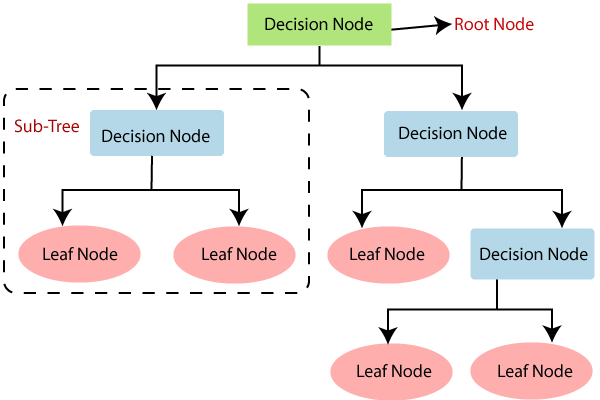

**Decision Tree Terminologies**

**1.Root Node:** Root node is from where the decision tree starts. It represents the entire dataset, which further gets divided into two or more homogeneous sets.

**2.Leaf Node:** Leaf nodes are the final output node, and the tree cannot be segregated further after getting a leaf node.

**3.Splitting:** Splitting is the process of dividing the decision node/root node into sub-nodes according to the given conditions.

**4.Branch/Sub Tree:** A tree formed by splitting the tree.

**5.Pruning:** Pruning is the process of removing the unwanted branches from the tree.

**6.Parent/Child node:** The root node of the tree is called the parent node, and other nodes are called the child nodes.

**Decision tree regression**

A regression tree is basically a decision tree that is used for the task of regression which can be used to predict continuous valued outputs instead of discrete output

**How does algorithem work?**

In a decision tree, for predicting the class of the given dataset, the algorithm starts from the root node of the tree. This algorithm compares the values of root attribute with the record (real dataset) attribute and, based on the comparison, follows the branch and jumps to the next node.

For the next node, the algorithm again compares the attribute value with the other sub-nodes and move further. It continues the process until it reaches the leaf node of the tree.

Step-1: Begin the tree with the root node, says S, which contains the complete dataset.

Step-2: Find the best attribute in the dataset using Attribute Selection Measure (ASM).

Step-3: Divide the S into subsets that contains possible values for the best attributes.

Step-4: Generate the decision tree node, which contains the best attribute.

Step-5: Recursively make new decision trees using the subsets of the dataset created in step -3. Continue this process until a stage is reached where you cannot further classify the nodes and called the final node as a leaf node.

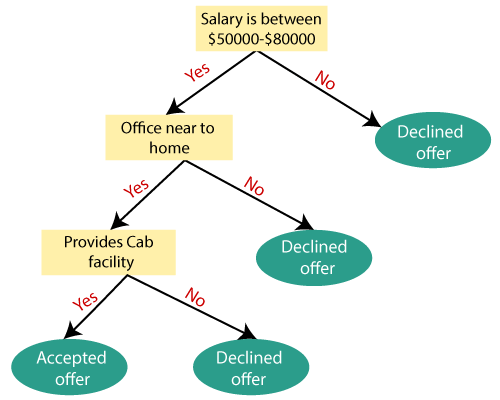

**Refference**:https://www.javatpoint.com/machine-learning-decision-tree-classification-algorithm

In [1]:
import pandas as pd          
import numpy as np 
import seaborn as sns # For mathematical calculations
import matplotlib.pyplot as plt  # For plotting graphs


**The dataset contains information about 506 houses in Boston, Massachusetts in the 1970s. Each house is described by 13 features, including:**

CRIM: per capita crime rate by town

ZN: proportion of residential land zoned for lots over 25,000 sq.ft.

INDUS: proportion of non-retail business acres per town

CHAS: Charles River dummy variable (1 if tract bounds river; 0 otherwise)

NOX: nitric oxides concentration (parts per 10 million)

RM: average number of rooms per dwelling

AGE: proportion of owner-occupied units built prior to 1940

DIS: weighted distances to five Boston employment centers

RAD: index of accessibility to radial highways

TAX: full-value property-tax rate per $10,000

PTRATIO: pupil-teacher ratio by town

B: 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town

LSTAT: % lower status of the population

The target variable in this dataset is the median value of owner-occupied homes in $1000s, which is a continuous variable.
where the objective is to predict the median value of owner-occupied homes based on the 13 features provided.

**Reference**:
https://www.kaggle.com/datasets/willianleite/boston-housing-dataset

In [2]:
df = pd.read_csv("HousingData.csv")
df.head(5)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


In [3]:
df.shape

(506, 14)

**Observation**

This data set has 14 features and 506 rows i.e. details of 506 houses.

In [4]:
# Information about the dataset features
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     486 non-null    float64
 1   ZN       486 non-null    float64
 2   INDUS    486 non-null    float64
 3   CHAS     486 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      486 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    486 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


**Observation:**

We can see that all features in the dataset are numeric type either float or int. There is no categorical variable

In [5]:
## checking the percentage of nan values present in each feature

features_with_na=[features for features in df.columns if df[features].isnull().sum()>1]

for feature in features_with_na:
    print(feature, np.round(df[feature].isnull().mean(), 4),  ' % missing values')

CRIM 0.0395  % missing values
ZN 0.0395  % missing values
INDUS 0.0395  % missing values
CHAS 0.0395  % missing values
AGE 0.0395  % missing values
LSTAT 0.0395  % missing values


In [6]:
# Checking null values in dataset
df.isnull().sum()

CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
MEDV        0
dtype: int64

In [7]:
df = df.fillna(df.median())#fill the null values with median value

<AxesSubplot:>

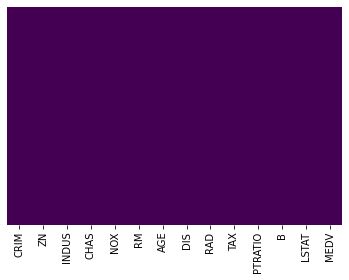

In [8]:
# Checking the null values using heatmap
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [9]:
# list of numerical variables
numerical_features = [feature for feature in df.columns if df[feature].dtypes != 'O']

print('Number of numerical variables: ', len(numerical_features))

# visualisizing the numerical variables
df[numerical_features].head()

Number of numerical variables:  14


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,11.43,36.2


In [10]:
discrete_feature=[feature for feature in numerical_features if len(df[feature].unique())<25]
print("Discrete Variables Count: {}".format(len(discrete_feature)))

Discrete Variables Count: 2


In [11]:
discrete_feature

['CHAS', 'RAD']

In [12]:
#unique values in CHAS variable
df['CHAS'].value_counts()

0.0    472
1.0     34
Name: CHAS, dtype: int64

<AxesSubplot:xlabel='CHAS', ylabel='count'>

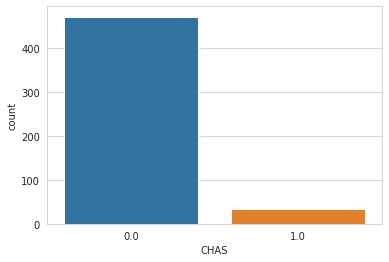

In [13]:
sns.set_style('whitegrid')
sns.countplot(x='CHAS',data=df)

In [14]:
#unique values in RAD variable
df['RAD'].value_counts()

24    132
5     115
4     110
3      38
6      26
2      24
8      24
1      20
7      17
Name: RAD, dtype: int64

<AxesSubplot:xlabel='RAD', ylabel='count'>

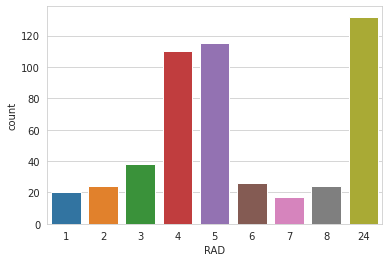

In [15]:
sns.set_style('whitegrid')
sns.countplot(x='RAD',data=df)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='AGE'>

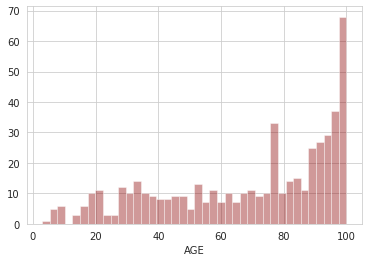

In [16]:
#this displot shows the distiribution of the data in AGE variable
sns.distplot(df['AGE'],kde=False,color='darkred',bins=40)

<AxesSubplot:xlabel='RM'>

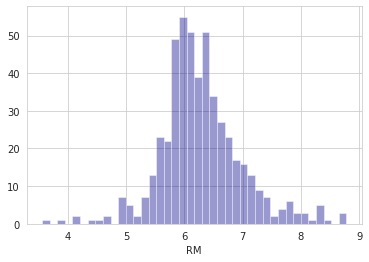

In [17]:
#this displot shows the distiribution of the data in RM variable
sns.distplot(df['RM'].dropna(),kde=False,color='darkblue',bins=40)

In [18]:
#toatal number continuous features in dataset
continuous_feature=[feature for feature in numerical_features if feature not in discrete_feature]
print("Continuous feature Count {}".format(len(continuous_feature)))

Continuous feature Count 12


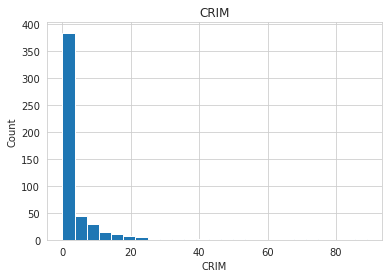

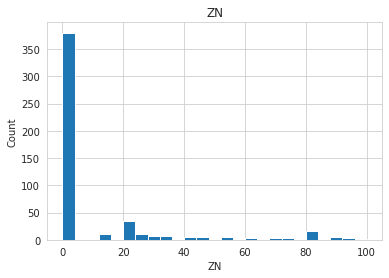

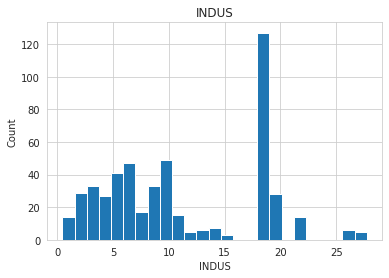

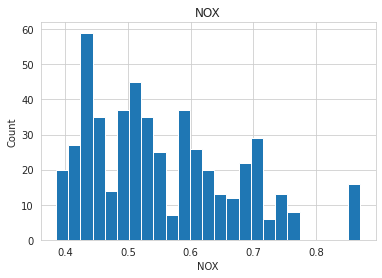

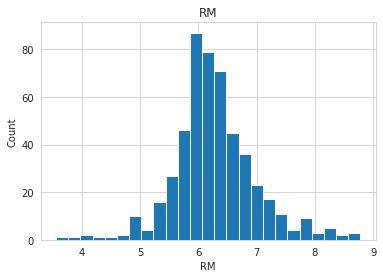

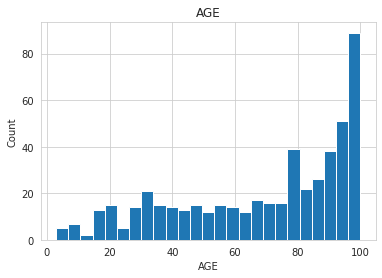

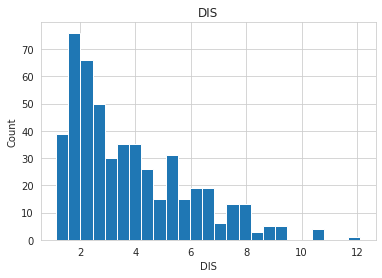

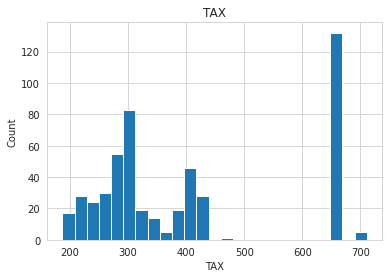

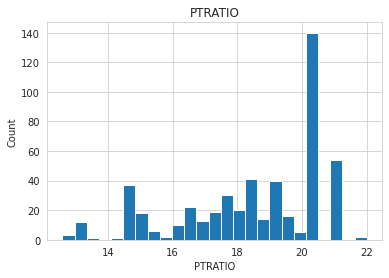

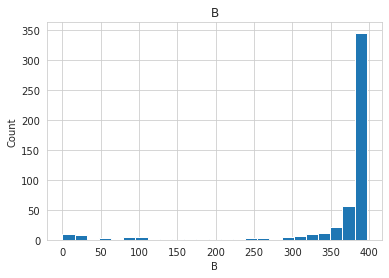

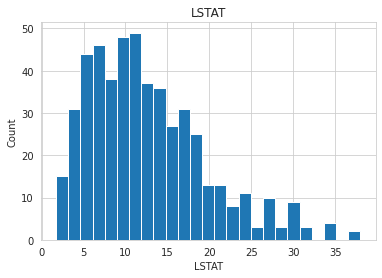

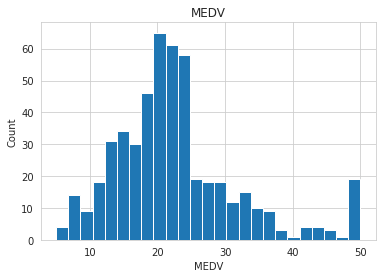

In [19]:
##  analysing the continuous values by creating histograms to understand the distribution

for feature in continuous_feature:
    data=df.copy()
    data[feature].hist(bins=25)
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(feature)
    plt.show()


**Observation**

From abover histogram we can obeserve that 

1.CRIM and ZN left sckewed

2.B variable right sckewed 

and we can also oberverd that the target column MEDV is normaly distributed

In [20]:
# Check the  Statistical Numerical Data Distribution Summary
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.479140,10.768775,11.028893,0.067194,0.554695,6.284634,68.845850,3.795043,9.549407,408.237154,18.455534,356.674032,12.664625,22.532806
std,8.570832,23.025124,6.704679,0.250605,0.115878,0.702617,27.486962,2.105710,8.707259,168.537116,2.164946,91.294864,7.017219,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.083235,0.000000,5.190000,0.000000,0.449000,5.885500,45.925000,2.100175,4.000000,279.000000,17.400000,375.377500,7.230000,17.025000
50%,0.253715,0.000000,9.690000,0.000000,0.538000,6.208500,76.800000,3.207450,5.000000,330.000000,19.050000,391.440000,11.430000,21.200000
75%,2.808720,0.000000,18.100000,0.000000,0.624000,6.623500,93.575000,5.188425,24.000000,666.000000,20.200000,396.225000,16.570000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [21]:
corr=df.corr()

<AxesSubplot:>

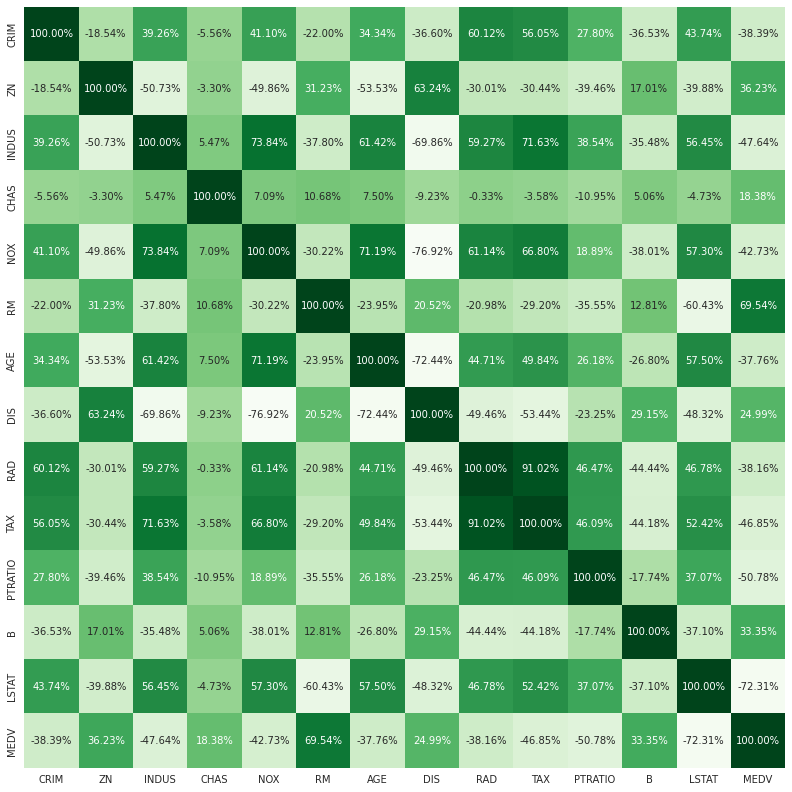

In [22]:

# Plotting the heatmap of correlation between features
plt.figure(figsize=(14,14))
sns.heatmap(corr, cbar=False, square= True, fmt='.2%', annot=True, cmap='Greens') # the correlation between the columns

**Observation:**

I observed that INDUS, RM, TAX, PTRATIO and LSTAT shows some good correaltion with MEDV

 INDUS shows good correlation with TAX and LSAT 

 TAX and RAD are highly corelated so i am going drop RAD

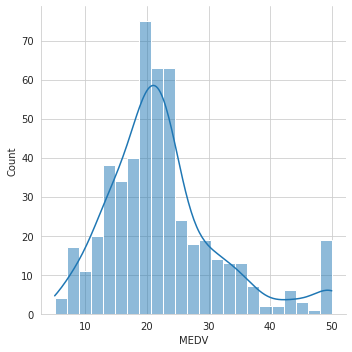

In [23]:
sns.displot(df['MEDV'],kde=True)

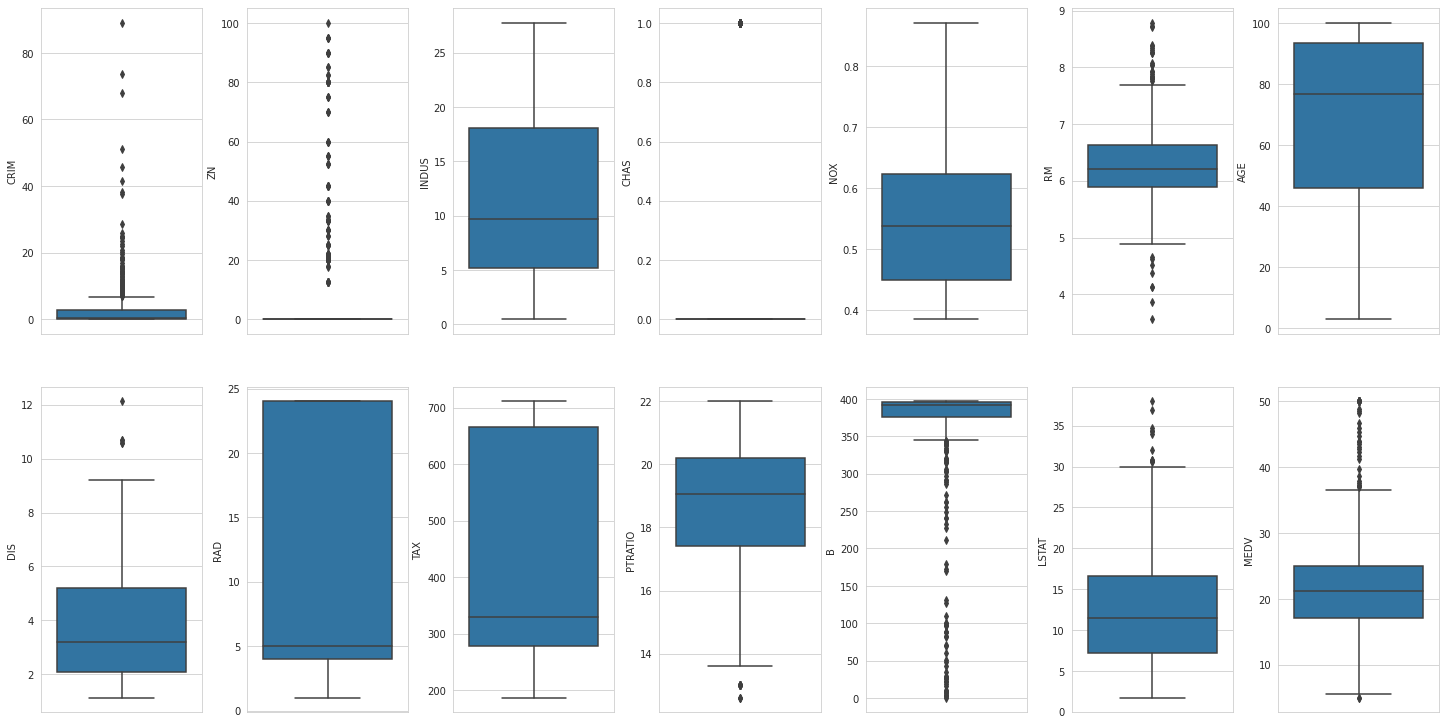

In [24]:
fig, axs = plt.subplots(ncols=7, nrows=2, figsize=(20, 10))
index = 0
axs = axs.flatten()
for k,v in df.items():
    sns.boxplot(y=k, data=df, ax=axs[index])
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

In [27]:
   for k, v in df.items():
        q1 = v.quantile(0.25)
        q3 = v.quantile(0.75)
        irq = q3 - q1
        v_col = v[(v <= q1 - 1.5 * irq) | (v >= q3 + 1.5 * irq)]
        perc = np.shape(v_col)[0] * 100.0 / np.shape(df)[0]
        print("Column %s outliers = %.2f%%" % (k, perc))

Column CRIM outliers = 16.01%
Column ZN outliers = 100.00%
Column INDUS outliers = 0.00%
Column CHAS outliers = 100.00%
Column NOX outliers = 0.00%
Column RM outliers = 5.93%
Column AGE outliers = 0.00%
Column DIS outliers = 0.99%
Column RAD outliers = 0.00%
Column TAX outliers = 0.00%
Column PTRATIO outliers = 2.96%
Column B outliers = 15.22%
Column LSTAT outliers = 2.37%
Column MEDV outliers = 7.91%


In [28]:
df=df.drop('ZN',axis=1)

In [29]:
from scipy import stats
import numpy as np
z = np.abs(stats.zscore(df))
print(z)

         CRIM     INDUS      CHAS       NOX        RM       AGE       DIS  \
0    0.405592  1.301706  0.268391  0.144217  0.413672  0.132771  0.140214   
1    0.403140  0.591052  0.268391  0.740262  0.194274  0.366141  0.557160   
2    0.403142  0.591052  0.268391  0.740262  1.282714  0.282080  0.557160   
3    0.402549  1.321115  0.268391  0.835284  1.016303  0.839258  1.077737   
4    0.398265  1.321115  0.268391  0.835284  1.228577  0.533356  1.077737   
..        ...       ...       ...       ...       ...       ...       ...   
501  0.399015  0.134533  0.268391  0.158124  0.439316  0.009255  0.625796   
502  0.401043  0.134533  0.268391  0.158124  0.234548  0.286024  0.716639   
503  0.399234  0.134533  0.268391  0.158124  0.984960  0.806785  0.773684   
504  0.393531  0.134533  0.268391  0.158124  0.725672  0.744876  0.668437   
505  0.400793  0.134533  0.268391  0.158124  0.362767  0.289665  0.613246   

          RAD       TAX   PTRATIO         B     LSTAT      MEDV  
0    0.98

In [30]:
threshold = 3
print(np.where(z > 3))

(array([102, 141, 142, 154, 155, 160, 162, 163, 208, 209, 210, 211, 212,
       216, 218, 219, 220, 221, 222, 225, 234, 236, 257, 262, 269, 273,
       274, 276, 277, 282, 283, 351, 352, 353, 354, 355, 356, 357, 358,
       363, 364, 364, 365, 367, 369, 370, 372, 373, 374, 374, 380, 398,
       404, 405, 406, 410, 410, 411, 412, 412, 414, 414, 415, 416, 418,
       418, 419, 423, 424, 425, 426, 427, 427, 429, 431, 436, 437, 438,
       438, 445, 450, 454, 455, 456, 457, 466]), array([10, 11,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  4,  2,  2,  4,  4,  2,  2,  2,  2,  2,  2,  2,  6,  6,  6,
        6,  6,  2,  2,  2,  2,  2,  4,  4,  4,  2,  2,  2, 11,  4, 11,  0,
        0,  0,  0,  4,  0, 10, 10, 10, 11,  0, 11, 10, 10,  0, 10, 10, 10,
       10, 10, 10,  0, 10, 10, 10, 10, 10, 10, 11, 10, 10, 10, 10, 10, 10,
       10]))


In [31]:
df = df[(z < 3).all(axis=1)]
df.shape

(428, 13)

In [32]:
class Node():
    def __init__(self, feature_index=None, threshold=None, left=None, right=None, var_red=None, value=None):
        ''' constructor ''' 
        
        # for decision node
        self.feature_index = feature_index
        self.threshold = threshold
        self.left = left
        self.right = right
        self.var_red = var_red
        
        # for leaf node
        self.value = value

**Explanation :**
It can be used as a building block for creating decision trees

This code defines a class Node with attributes for decision nodes and leaf nodes in a decision tree.

For decision nodes, the attributes are:

1.feature_index: the index of the feature used to make the split at this node.

2.threshold: the threshold value used to make the split at this node.

3.left: the left child node.

right: the right child node.

4.var_red: the amount of variance reduction achieved by the split at this node.

For leaf nodes, the attribute is:

5.value: the predicted value for the leaf node.

In [33]:
from itertools import product
import numpy as np
class DecisionTreeRegressor():
   # called every time an object is created from a class
    def __init__(self, min_samples_split=2, max_depth=2):
        ''' constructor '''
       
        # initialize the root of the tree 
        self.root = None
        
        # stopping conditions
        self.min_samples_split = min_samples_split #specifies the minimum number of samples required to split an internal node
        self.max_depth = max_depth  #determines the maximum depth of the decision tree that will be constructed
    def get_best_split(self, dataset, num_samples, num_features):
        ''' function to find the best split '''
        
        # dictionary to store the best split
        best_split = {}
        #ensure that the first value you encounter will be greater than the current maximum value
        max_var_red = -float("inf")
        # loop over all the features in the dataset
        for feature_index in range(num_features):
            feature_values = dataset[:, feature_index]
            #it will assighn the unique values in the dataset
            possible_thresholds = np.unique(feature_values)
            # loop over all the unique feature values present in the data
            for threshold in possible_thresholds:
                # get current split
                dataset_left, dataset_right = self.split(dataset, feature_index, threshold)
                # check if childs are not null 
                if len(dataset_left)>0 and len(dataset_right)>0:
                   y, left_y, right_y = dataset[:, -1], dataset_left[:, -1], dataset_right[:, -1]
                   # compute varience reduction for target variable
                   curr_var_red = self.variance_reduction(y, left_y, right_y)
                   # update the best split if needed
                   # if curr_var_red is greater than max_var_red then it will update the best split as this value
                   if curr_var_red>max_var_red:
                     best_split["feature_index"] = feature_index
                     best_split["threshold"] = threshold
                     best_split["dataset_left"] = dataset_left
                     best_split["dataset_right"] = dataset_right
                     best_split["var_red"] = curr_var_red
                     max_var_red = curr_var_red
                        
        # return best split
        return best_split
    
    def split(self, dataset, feature_index, threshold):
        ''' function to split the data '''
        # if feature value or index is less than or equal to the threshold then the value is assighned to left 
        dataset_left = np.array([row for row in dataset if row[feature_index]<=threshold])
        # if feature value or index is greater than  to the threshold then the value is assighned to right 
        dataset_right = np.array([row for row in dataset if row[feature_index]>threshold])
        # after splitiing it will return the result
        return dataset_left, dataset_right
    
    def variance_reduction(self, parent, l_child, r_child):
        ''' function to compute variance reduction gfeature'''
        
        weight_l = len(l_child) / len(parent)# calculates the weight of the left child node relative to its parent node
        weight_r = len(r_child) / len(parent)# calculates the weight of the right child node relative to its parent node
        #after calculating weight of left and right child then using this we are going to calculate the varience reduction using this formula 
        #taking sum of the right and left child and subtracting with the varience of parent 
        reduction = np.var(parent) - (weight_l * np.var(l_child) + weight_r * np.var(r_child))
        #return the varience reduction
        return reduction
    
    def calculate_leaf_value(self, Y):
        ''' function to compute leaf node '''
        #calculates the mean value of the target variable Y in a leaf node
        val = np.mean(Y)
        return val  

    def build_tree(self, dataset, curr_depth=0):
        ''' recursive function to build the tree '''
        #it will separate the data into independent and dependet 
        X, Y = dataset[:,:-1], dataset[:,-1]
        num_samples, num_features = np.shape(X)
        #this dictionory will store best split value
        best_split = {}
        # split until stopping conditions are met
        if num_samples>=self.min_samples_split and curr_depth<=self.max_depth:
          # find the best split
          best_split = self.get_best_split(dataset, num_samples, num_features)
          # check  varience reduction
          if best_split["var_red"]>0:
            left_subtree = self.build_tree(best_split["dataset_left"], curr_depth+1)
            #  recursively builds the right subtree of a decision tree node
            right_subtree = self.build_tree(best_split["dataset_right"], curr_depth+1)
            # return decision node
            return Node(best_split["feature_index"], best_split["threshold"],left_subtree, right_subtree, best_split["var_red"])
        
        # compute leaf node
        leaf_value = self.calculate_leaf_value(Y)
        # return leaf node
        return Node(value=leaf_value)
    
    
    #it will shows the how the tree will be build 
    def print_tree(self, tree=None, indent=" "):
        ''' function to print the tree '''
        
        if not tree:
            tree = self.root

        if tree.value is not None:
            print(tree.value)

        else:
            print("X_"+str(tree.feature_index), "<=", tree.threshold, "?", tree.var_red)
            print("%sleft:" % (indent), end="")
            self.print_tree(tree.left, indent + indent)
            print("%sright:" % (indent), end="")
            self.print_tree(tree.right, indent + indent)
    
    def fit(self, X, Y):
        ''' function to train the tree 
        This fit() function is used to train (fit) a decision tree model using a training dataset
        X and corresponding target variable Y.'''
        dataset = np.concatenate((X, Y), axis=1)
        self.root = self.build_tree(dataset)
        
    def make_prediction(self, x, tree):
        ''' function to predict new dataset 
        this function is used to make predictions for new data points x using a trained decision tree model tree'''
        
        if tree.value!=None: return tree.value
        feature_val = x[tree.feature_index]
        #the feature value is less than or equal to the threshol value of the tree it will make prediction on left tree else make prediction on right tree
        if feature_val<=tree.threshold:
            return self.make_prediction(x, tree.left)
        else:
            return self.make_prediction(x, tree.right)
    
    def predict(self, X):
        ''' function to predict a single data point 
        This function call recursively traverses the decision tree based on the feature values of x, 
        until it reaches a leaf node, at which point it returns the predicted output value'''
        preditions = [self.make_prediction(x, self.root) for x in X]
        return preditions

    def set_params(self, **params):
      '''function is used to set the values of the attributes of a decision tree object. The function takes a variable 
      number of keyword arguments (**params), 
      which are pairs of attribute names and their corresponding values that should be set for the decision tree object'''
      for param, value in params.items():
        setattr(self, param, value)
        return self

    def r2_score(y_true, y_pred):
      '''function calculates the R-squared score for a set of true target variable values (y_true) 
      and corresponding predicted target variable values (y_pred)'''
      ss_res = np.sum((y_true - y_pred) ** 2)
      #SS_res is the residual sum of squares (the sum of squared differences between the true and predicted values)
      ss_tot = np.sum((y_true - np.mean(y_true)) ** 2)
      #SS_tot is the total sum of squares (i.e., the sum of squared differences between the true values and the mean of the true values)
      r2 = 1 - ss_res / ss_tot
      return r2
    
    def mean_squared_error(self,y_true, y_pred):
   
      # Check if the lengths of both arrays are equal
      if len(y_true) != len(y_pred):
          raise ValueError("Length of y_true and y_pred should be the same.")
      
      # Calculate the squared differences between the true and predicted values
      squared_differences = [(y_true[i] - y_pred[i])**2 for i in range(len(y_true))]
      
      # Calculate the mean of the squared differences
      mse = sum(squared_differences) / len(squared_differences)
      
      return mse




  


    

In [35]:
df.drop(['CHAS','RAD','B'],axis=1)
X = df.iloc[:, :-1].values
Y = df.iloc[:, -1].values.reshape(-1,1)


In [47]:
import random
#This function is used to split the dataset into a training set and a test set
#The train_test_split function takes in three mandatory arguments X, y, and test_size, and an optional argument random_state
def train_test_split(X, y, test_size=0.2, random_state=None):
    if random_state:
        random.seed(random_state)
    
    n = len(X)
    test_data = set(random.sample(range(n), int(n * test_size)))
    train_data = set(range(n)) - test_data
    
    X_train = [X[i] for i in train_data]
    X_test = [X[i] for i in test_data]
    y_train = [y[i] for i in train_data]
    y_test = [y[i] for i in test_data]
    return X_train, X_test, y_train, y_test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=.2, random_state=5)

In [49]:
regressor = DecisionTreeRegressor(min_samples_split=4, max_depth=4)
regressor.fit(X_train,Y_train)
regressor.print_tree()


X_4 <= 6.794 ? 31.490804780503943
 left:X_11 <= 14.81 ? 11.735263244780256
  left:X_6 <= 1.3325 ? 6.670967597928115
    left:42.63333333333333
    right:X_11 <= 7.79 ? 4.004179395075749
        left:X_4 <= 6.481 ? 3.633942767747989
                left:23.490322580645167
                right:27.359090909090913
        right:X_5 <= 91.4 ? 1.4179576157555136
                left:21.046280991735536
                right:17.023076923076925
  right:X_0 <= 7.40389 ? 5.791628574392636
    left:X_5 <= 73.1 ? 2.584153180803572
        left:X_5 <= 39.0 ? 2.3305104166666673
                left:22.833333333333332
                right:19.68
        right:X_1 <= 25.65 ? 1.943736509026687
                left:16.388461538461538
                right:10.975
    right:X_11 <= 24.91 ? 3.8343195767195777
        left:X_11 <= 19.31 ? 1.2336810279667412
                left:14.011111111111111
                right:11.766666666666666
        right:X_4 <= 5.304 ? 1.793659611992945
                left:9.1

In [50]:
y_pred = regressor.predict(X_test)

In [51]:
y_pred

[27.359090909090913,
 21.046280991735536,
 36.0,
 21.046280991735536,
 21.046280991735536,
 21.046280991735536,
 21.046280991735536,
 21.046280991735536,
 16.388461538461538,
 21.046280991735536,
 27.359090909090913,
 29.244444444444444,
 36.0,
 21.046280991735536,
 21.046280991735536,
 23.490322580645167,
 27.359090909090913,
 27.359090909090913,
 21.046280991735536,
 27.359090909090913,
 21.046280991735536,
 23.490322580645167,
 21.046280991735536,
 21.046280991735536,
 27.359090909090913,
 16.388461538461538,
 17.023076923076925,
 21.046280991735536,
 16.388461538461538,
 16.388461538461538,
 17.023076923076925,
 17.023076923076925,
 16.388461538461538,
 16.388461538461538,
 17.023076923076925,
 29.244444444444444,
 27.359090909090913,
 17.023076923076925,
 48.375,
 17.023076923076925,
 17.023076923076925,
 23.490322580645167,
 21.046280991735536,
 32.516666666666666,
 27.359090909090913,
 32.516666666666666,
 32.516666666666666,
 48.375,
 48.375,
 21.046280991735536,
 38.7,
 48.375

In [52]:
np.sqrt(regressor.mean_squared_error(Y_test,y_pred))

array([3.83539674])

In [53]:
from sklearn.metrics import r2_score
r2=r2_score(Y_test,y_pred)
r2

0.8075138403816667

In [54]:

# Perform grid search with cross validation for decision tree regression
def grid_search_cv(X, y, param_grid, cv=5):
    best_params, best_score = None, np.inf
    '''function to iterate over all possible combinations of hyperparameters specified 
    in param_grid and fits a DecisionTreeRegressor model for each combination.'''
    for params in product(*param_grid.values()):
        tree = DecisionTreeRegressor(*params)
        #to store the scores
        scores = []
        for i in range(cv):
            indices = np.arange(len(X))#it creates an array of indices for the input data X.
            np.random.shuffle(indices)
            fold_size = len(X) // cv# it calculates the size of each fold for cross-validation.
            val_indices = indices[i * fold_size : (i+1) * fold_size]#it selects the indices of the validation set for the current fold in cross-validation
            train_indices = np.concatenate((indices[:i * fold_size], indices[(i+1) * fold_size:]))#selects the indices of the training set for the current fold in cross-validation
            X_train, y_train = X[train_indices], y[train_indices]
            X_val, y_val = X[val_indices], y[val_indices]
            tree.fit(X_train, y_train)
            y_pred = tree.predict(X_val)
            scores.append(mean_squared_error(y_val, y_pred))
        score = np.mean(scores)
        if score < best_score:
            best_params, best_score = params, score
    return best_params, best_score

In [57]:
from sklearn.metrics import mean_squared_error
# Define the parameter grid to search over
param_grid = {'max_depth': [2,3,4,5,10,15,8],
    'min_samples_split': [2,3, 4,10,12,8,6]
  }

# Perform grid search with cross validation for decision tree regression
best_params = grid_search_cv(X, Y, param_grid, cv=5)

print("Best parameters:", best_params)
#print("Best parameters:", best_score)


Best parameters: ((3, 3), 13.495962232995117)


In [58]:
from sklearn.metrics import mean_squared_error
from random import randint
'''The defaultdict is a subclass of the built-in dict class.
 It overrides one method, __missing__, and adds one writable instance variable, default_factory'''
from collections import defaultdict

# Define the hyperparameters to be tuned
max_depth = [int(x) for x in np.linspace(5, 60, num = 11)]
min_samples_split = [2, 4, 6, 8, 10,12,20,30]
min_samples_leaf = [1, 2, 3, 4, 5,8,10,20]

# Define the number of iterations for hyperparameter tuning
n_iter = 20

# Define the number of folds for cross-validation
n_folds = None

# Define a function for k-fold cross-validation
def k_fold_cv(X, y, model, n_folds):
    # Initialize a dictionary to store the cross-validation scores
    cv_scores = defaultdict(list)

    # Divide the data into k folds
    fold_size = len(X) // n_folds
    #fold_starts that contains the starting index of each fold
    fold_starts = [i * fold_size for i in range(n_folds)]
    '''It uses a list comprehension to iterate over the range of n_folds and computes 
    the starting index of each fold as i * fold_size, where i is the fold number'''
    fold_ends = [(i + 1) * fold_size for i in range(n_folds)]
    #fold_ends that contains the ending index of each fold
    fold_ends[-1] = len(X)
    #this line updates the last value in fold_ends to be equal to the length of the dataset X

    # Perform k-fold cross-validation
    for i in range(n_folds):
        # Split the data into training and validation sets
        X_train = np.concatenate([X[:fold_starts[i]], X[fold_ends[i]:]])
        y_train = np.concatenate([y[:fold_starts[i]], y[fold_ends[i]:]])
        X_valid = X[fold_starts[i]:fold_ends[i]]
        y_valid = y[fold_starts[i]:fold_ends[i]]
  
        # Define the hyperparameters to be tuned
        params = {'max_depth': max_depth[randint(0, len(max_depth)-1)],
                  'min_samples_split': min_samples_split[randint(0, len(min_samples_split)-1)],
                  'min_samples_leaf': min_samples_leaf[randint(0, len(min_samples_leaf)-1)]}

        # Train the model with the current hyperparameters
        model.set_params(**params)
        model.fit(X_train, y_train)

        # Evaluate the model on the validation set
        y_pred = model.predict(X_valid)
        mse = mean_squared_error(y_valid, y_pred)

        # Store the cross-validation score
        cv_scores[mse].append(params)

    # Return the best hyperparameters and the corresponding mean squared error
    best_params = cv_scores[min(cv_scores)][0]
    best_mse = min(cv_scores)

    return best_params, best_mse


# Define the decision tree regressor model
dt = DecisionTreeRegressor()

# Perform the hyperparameter tuning using k-fold cross-validation and randomized search
best_params, best_mse = k_fold_cv(X, Y, dt, n_folds=10)

# Print the best hyperparameters and the corresponding mean squared error
print("Best hyperparameters:", best_params)
print("Best mean squared error:", best_mse)



Best hyperparameters: {'max_depth': 5, 'min_samples_split': 20, 'min_samples_leaf': 8}
Best mean squared error: 6.455302868515757


**Advantages of Decision Tree Regression in CART:**

**Easy to Understand:** Decision tree regression is easy to understand and interpret. It provides a visual representation of the decision-making process and can be easily explained to non-technical stakeholders.

**Nonlinear Relationships:** Decision tree regression can handle nonlinear relationships between features and the target variable, making it a good choice for datasets with complex relationships.

**Handles Missing Data:** Decision tree regression can handle missing data without requiring imputation or elimination of missing data.

**Robust to Outliers:** Decision tree regression is robust to outliers since it partitions the feature space into regions and fits a simple model to each region.

**Variable Selection:** Decision tree regression can perform variable selection by identifying the most important features for prediction.

**Disadvantages of Decision Tree Regression in CART:**

**Overfitting:** Decision tree regression is prone to overfitting, especially when the tree becomes too complex. Overfitting occurs when the model fits the training data too closely and does not generalize well to new data.

**Instability:** Decision tree regression can be unstable, meaning that small changes in the data can lead to large changes in the tree structure.

**Bias:** Decision tree regression can be biased towards features that have a large number of levels or that appear earlier in the tree.